<a href="https://colab.research.google.com/github/ahmadilham17/tugas-uas-kecerdasan-buatan/blob/main/balanced_model_for_bankruptcy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Hubungkan google colab dengan drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [22]:
# Membaca dataset
df = pd.read_csv('/content/drive/MyDrive/Classroom/Kecerdasan_Buatan/UAS/dataset/data.csv')

**This notebook is inspired by the work of [rabieelkharoua](https://www.kaggle.com/rabieelkharoua). You can visit the notebook [FRAUDFIGHTER](https://www.kaggle.com/code/rabieelkharoua/fraudfighter-detecting-credit-card-fraud-ac-97/notebook#4.-Handling-Data-Imbalance) for clear explanations on the Topics.**

In [23]:
import warnings

# Untuk mengabaikan semua peringatan
warnings.filterwarnings('ignore')

In [24]:
# Mengatur opsi tampilan untuk menampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# **Exploring the Dataframe**

In [25]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [26]:
# Hapus spasi awal dan akhir dari nama kolom
df.columns = df.columns.str.strip()

# Opsional, ganti spasi internal dengan garis bawah
df.columns = df.columns.str.replace(' ', '_')

In [27]:
def get_df_info(df):
    # Mencetak bentuk (shape) dari DataFrame, yaitu jumlah baris dan kolom.
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)

    # Mencetak daftar kolom yang ada dalam DataFrame.
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())

    # Mencetak tipe data dari masing-masing kolom dalam DataFrame.
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)

    # Mencetak informasi umum tentang DataFrame, seperti jumlah entri, tipe data, dan penggunaan memori.
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()

    # Mencetak jumlah nilai unik di setiap kolom DataFrame.
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")

    # Mencetak jumlah nilai null di setiap kolom, jika ada.
    print("\n\033[1mNull values in columns:\033[0m")
    null_counts = df.isnull().sum()
    null_columns = null_counts[null_counts > 0]
    if len(null_columns) > 0:
        for col, count in null_columns.items():
            print(f"\033[1m{col}\033[0m: {count}")
    else:
        print("There are no null values in the DataFrame.")

    # Mencetak jumlah baris duplikat dalam DataFrame.
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())

    # Mencetak statistik deskriptif dari DataFrame, seperti mean, std, min, max, dll, dan mengembalikan hasilnya dalam bentuk DataFrame yang ditranspose.
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n",)
    return df.describe().transpose()

# Memanggil function get_df_info()
get_df_info(df)


Shape of DataFrame:  (6819, 96)

Columns in DataFrame:  ['Bankrupt?', 'ROA(C)_before_interest_and_depreciation_before_interest', 'ROA(A)_before_interest_and_%_after_tax', 'ROA(B)_before_interest_and_depreciation_after_tax', 'Operating_Gross_Margin', 'Realized_Sales_Gross_Margin', 'Operating_Profit_Rate', 'Pre-tax_net_Interest_Rate', 'After-tax_net_Interest_Rate', 'Non-industry_income_and_expenditure/revenue', 'Continuous_interest_rate_(after_tax)', 'Operating_Expense_Rate', 'Research_and_development_expense_rate', 'Cash_flow_rate', 'Interest-bearing_debt_interest_rate', 'Tax_rate_(A)', 'Net_Value_Per_Share_(B)', 'Net_Value_Per_Share_(A)', 'Net_Value_Per_Share_(C)', 'Persistent_EPS_in_the_Last_Four_Seasons', 'Cash_Flow_Per_Share', 'Revenue_Per_Share_(Yuan_¥)', 'Operating_Profit_Per_Share_(Yuan_¥)', 'Per_Share_Net_profit_before_tax_(Yuan_¥)', 'Realized_Sales_Gross_Profit_Growth_Rate', 'Operating_Profit_Growth_Rate', 'After-tax_Net_Profit_Growth_Rate', 'Regular_Net_Profit_Growth_Rate', '

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,3.226280e-02,1.767102e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
ROA(C)_before_interest_and_depreciation_before_interest,6819.0,5.051796e-01,6.068564e-02,0.0,4.765271e-01,5.027056e-01,5.355628e-01,1.000000e+00
ROA(A)_before_interest_and_%_after_tax,6819.0,5.586249e-01,6.562003e-02,0.0,5.355430e-01,5.598016e-01,5.891572e-01,1.000000e+00
ROA(B)_before_interest_and_depreciation_after_tax,6819.0,5.535887e-01,6.159481e-02,0.0,5.272766e-01,5.522780e-01,5.841051e-01,1.000000e+00
Operating_Gross_Margin,6819.0,6.079480e-01,1.693381e-02,0.0,6.004447e-01,6.059975e-01,6.139142e-01,1.000000e+00
Realized_Sales_Gross_Margin,6819.0,6.079295e-01,1.691607e-02,0.0,6.004338e-01,6.059759e-01,6.138421e-01,1.000000e+00
Operating_Profit_Rate,6819.0,9.987551e-01,1.301003e-02,0.0,9.989692e-01,9.990222e-01,9.990945e-01,1.000000e+00
Pre-tax_net_Interest_Rate,6819.0,7.971898e-01,1.286899e-02,0.0,7.973859e-01,7.974636e-01,7.975788e-01,1.000000e+00
After-tax_net_Interest_Rate,6819.0,8.090836e-01,1.360065e-02,0.0,8.093116e-01,8.093752e-01,8.094693e-01,1.000000e+00
Non-industry_income_and_expenditure/revenue,6819.0,3.036229e-01,1.116344e-02,0.0,3.034663e-01,3.035255e-01,3.035852e-01,1.000000e+00


In [28]:
# Mengimpor modul pyplot dari pustaka matplotlib dengan alias plt.
# Pyplot adalah modul yang menyediakan sebuah antarmuka seperti MATLAB untuk membuat grafik dan plot.
import matplotlib.pyplot as plt

# Mengimpor pustaka seaborn dengan alias sns.
# Seaborn adalah pustaka visualisasi data yang dibangun di atas matplotlib,
# menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang atraktif dan informatif.
import seaborn as sns

<Axes: xlabel='Bankrupt?', ylabel='count'>

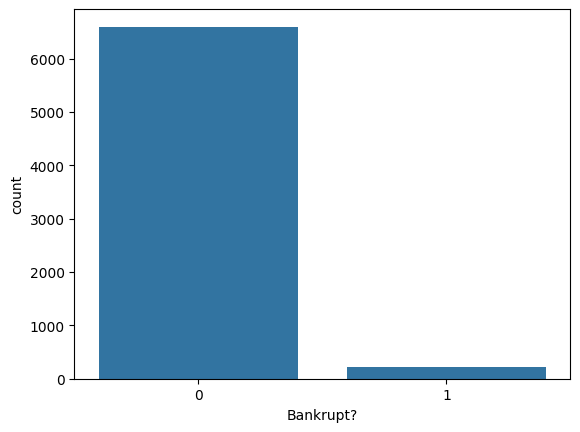

In [29]:
# Membuat count plot menggunakan seaborn.
# Count plot digunakan untuk menghitung frekuensi kategori dalam kolom tertentu.
# Dalam hal ini, kita menghitung jumlah entri untuk masing-masing kategori di kolom 'Bankrupt?'.
sns.countplot(x='Bankrupt?', data=df)

**There is a Class Imbalance in this case. We need to handle the Imbalance using appropriate techniques**

# **Feature Selection**

> **We will choose only those Features with absolute correlation >= 0.1 with the Target Variable**

In [30]:
# Menghitung matriks korelasi dari DataFrame df.
# Fungsi corr() menghitung korelasi pairwise antara kolom-kolom DataFrame.
# Mengambil korelasi antara kolom 'Bankrupt?' dan kolom-kolom lainnya dalam DataFrame.
df.corr()['Bankrupt?']

Bankrupt?                                                  1.000000
ROA(C)_before_interest_and_depreciation_before_interest   -0.260807
ROA(A)_before_interest_and_%_after_tax                    -0.282941
ROA(B)_before_interest_and_depreciation_after_tax         -0.273051
Operating_Gross_Margin                                    -0.100043
Realized_Sales_Gross_Margin                               -0.099445
Operating_Profit_Rate                                     -0.000230
Pre-tax_net_Interest_Rate                                 -0.008517
After-tax_net_Interest_Rate                               -0.008857
Non-industry_income_and_expenditure/revenue               -0.016593
Continuous_interest_rate_(after_tax)                      -0.008395
Operating_Expense_Rate                                    -0.006083
Research_and_development_expense_rate                     -0.024232
Cash_flow_rate                                            -0.072356
Interest-bearing_debt_interest_rate             

In [31]:
target_variable = 'Bankrupt?'

# Hitung matrix korelasi
correlation_matrix = df.corr()

# Dapatkan korelasi dengan variabel target
target_correlations = correlation_matrix[target_variable].abs().sort_values(ascending=False)

# Hapus variabel target itu sendiri dari daftar
target_correlations = target_correlations.drop(target_variable)

# Pilih fitur dengan korelasi absolut >= 0.1
selected_features = target_correlations[target_correlations >= 0.1]

print("Features with absolute correlation >= 0.1 with 'Bankrupt?':")
print(selected_features)

# Cetak jumlah fitur yang terpilih
print(f"\nNumber of selected features: {len(selected_features)}")

# Buat kerangka data baru dengan fitur-fitur ini
selected_columns = list(selected_features.index)
df_selected = df[selected_columns]

print("\nShape of the new dataframe with selected features:")
print(df_selected.shape)

Features with absolute correlation >= 0.1 with 'Bankrupt?':
Net_Income_to_Total_Assets                                 0.315457
ROA(A)_before_interest_and_%_after_tax                     0.282941
ROA(B)_before_interest_and_depreciation_after_tax          0.273051
ROA(C)_before_interest_and_depreciation_before_interest    0.260807
Net_worth/Assets                                           0.250161
Debt_ratio_%                                               0.250161
Persistent_EPS_in_the_Last_Four_Seasons                    0.219560
Retained_Earnings_to_Total_Assets                          0.217779
Net_profit_before_tax/Paid-in_capital                      0.207857
Per_Share_Net_profit_before_tax_(Yuan_¥)                   0.201395
Current_Liability_to_Assets                                0.194494
Working_Capital_to_Total_Assets                            0.193083
Net_Income_to_Stockholder's_Equity                         0.180987
Borrowing_dependency                                    

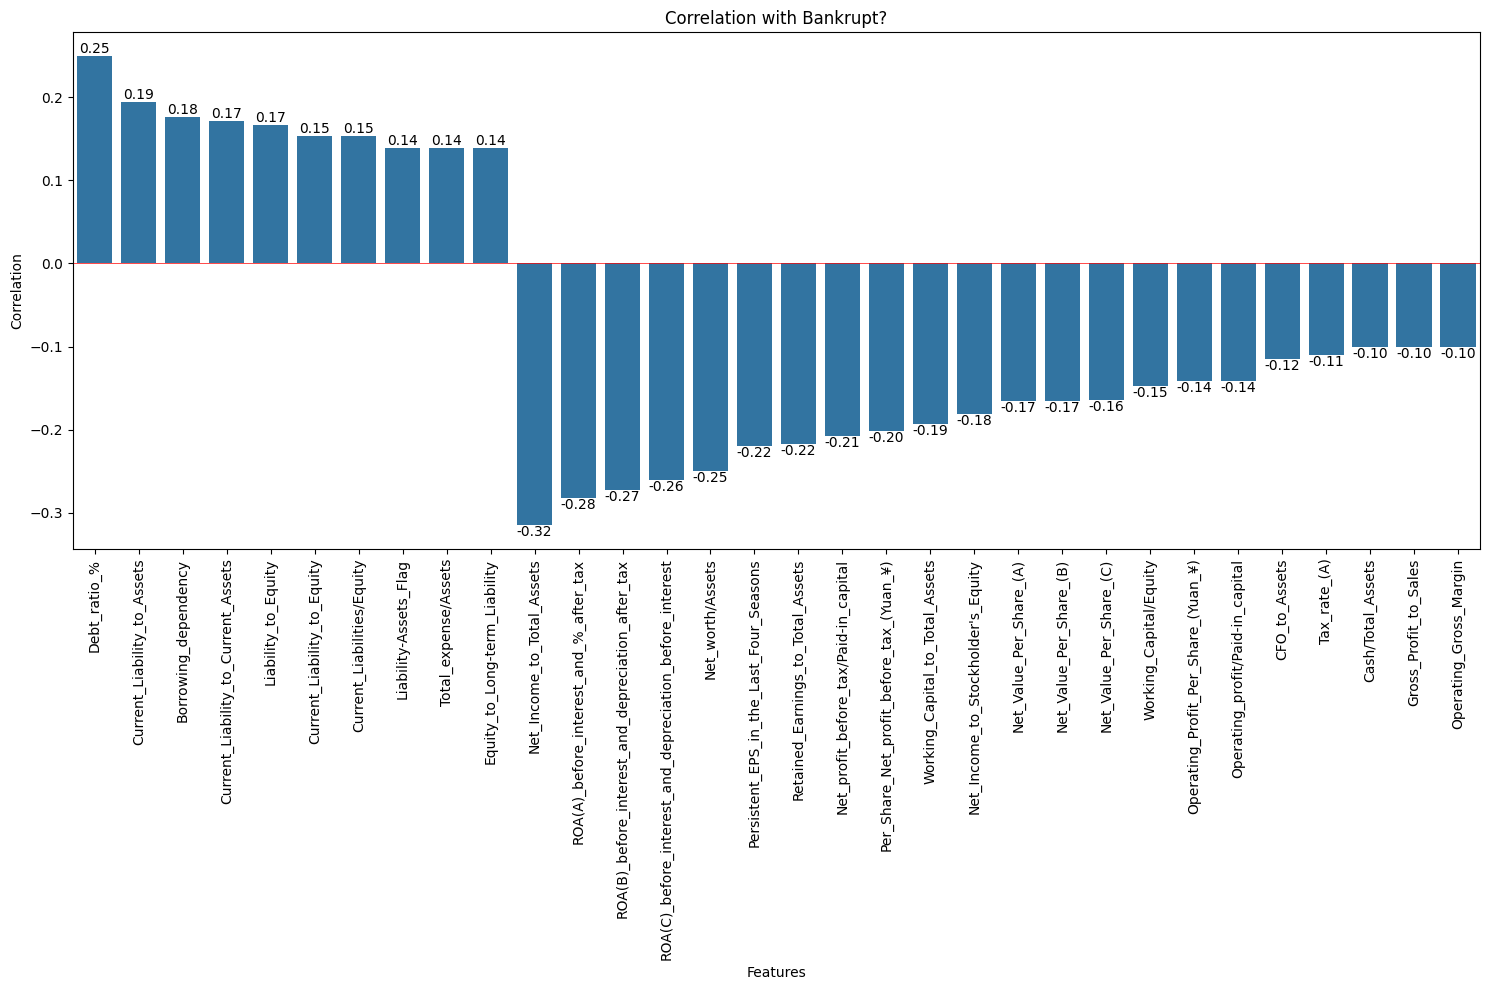

In [32]:
# Dapatkan nilai korelasi aktual untuk fitur yang dipilih
actual_correlations = correlation_matrix[target_variable][selected_features.index]

# Urutkan korelasinya
positive_correlations = actual_correlations[actual_correlations >= 0].sort_values(ascending=False)
negative_correlations = actual_correlations[actual_correlations < 0].sort_values(ascending=True)
sorted_correlations = pd.concat([positive_correlations, negative_correlations])

# Buat plot batang menggunakan Seaborn
plt.figure(figsize=(15, 10))
sns.barplot(x=sorted_correlations.index, y=sorted_correlations.values)
plt.title(f'Correlation with {target_variable}')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)  # Add a horizontal line at y=0
plt.tight_layout()

# Tambahkan label nilai di atas setiap batang
for i, v in enumerate(sorted_correlations):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

# Tampilkan plot nya
plt.show()

# **Handling Class Imbalance using UnderSampling**

In [33]:
from imblearn.under_sampling import RandomUnderSampler

# Pisahkan fitur x dan target y
X = df_selected
y = df['Bankrupt?']

# Inisialisasi RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Cocokkan dan terapkan resampler ke data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Konversikan data yang diambil sampelnya kembali menjadi DataFrame
downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Bankrupt?'])], axis=1)

# Menampilkan lima baris pertama dari DataFrame downsampled_df.
# Fungsi head() digunakan untuk melihat sampel data teratas dari DataFrame, secara default menampilkan lima baris pertama.
downsampled_df.head()

,Net_Income_to_Total_Assets,ROA(A)_before_interest_and_%_after_tax,ROA(B)_before_interest_and_depreciation_after_tax,ROA(C)_before_interest_and_depreciation_before_interest,Net_worth/Assets,Debt_ratio_%,Persistent_EPS_in_the_Last_Four_Seasons,Retained_Earnings_to_Total_Assets,Net_profit_before_tax/Paid-in_capital,Per_Share_Net_profit_before_tax_(Yuan_¥),Current_Liability_to_Assets,Working_Capital_to_Total_Assets,Net_Income_to_Stockholder's_Equity,Borrowing_dependency,Current_Liability_to_Current_Assets,Liability_to_Equity,Net_Value_Per_Share_(A),Net_Value_Per_Share_(B),Net_Value_Per_Share_(C),Current_Liability_to_Equity,Current_Liabilities/Equity,Working_Capital/Equity,Operating_Profit_Per_Share_(Yuan_¥),Operating_profit/Paid-in_capital,Liability-Assets_Flag,Total_expense/Assets,Equity_to_Long-term_Liability,CFO_to_Assets,Tax_rate_(A),Cash/Total_Assets,Gross_Profit_to_Sales,Operating_Gross_Margin,Bankrupt?
0,0.801098,0.540667,0.523636,0.471945,0.848414,0.151586,0.218209,0.937402,0.172355,0.173307,0.158235,0.843109,0.840529,0.379066,0.029128,0.281733,0.175087,0.175087,0.175087,0.334725,0.334725,0.739744,0.098770,0.098727,0,0.007583,0.110933,0.563210,0.134730,0.175664,0.607520,0.607518,0
1,0.808595,0.554187,0.558702,0.507093,0.910179,0.089821,0.228893,0.935813,0.179519,0.180688,0.031374,0.806480,0.840884,0.373600,0.016081,0.277676,0.208714,0.208714,0.208714,0.327370,0.327370,0.735242,0.109600,0.109597,0,0.013273,0.119485,0.597713,0.192631,0.041260,0.611967,0.611972,0
2,0.806939,0.550425,0.556936,0.503924,0.931765,0.068235,0.219060,0.935009,0.173132,0.174663,0.059468,0.850726,0.840704,0.370828,0.016632,0.276773,0.171126,0.171126,0.171126,0.328222,0.328222,0.737311,0.101376,0.101161,0,0.017194,0.112516,0.597065,0.150116,0.073488,0.605785,0.605788,0
3,0.771691,0.498528,0.503346,0.451275,0.823442,0.176558,0.207337,0.923341,0.157198,0.158168,0.153055,0.713068,0.837267,0.381590,0.066676,0.284545,0.159370,0.159370,0.159370,0.336150,0.336150,0.728100,0.096979,0.096943,0,0.036952,0.115667,0.560915,0.000000,0.009049,0.598436,0.598438,0
4,0.837382,0.613607,0.596445,0.533418,0.866886,0.133114,0.246478,0.945087,0.193296,0.194246,0.110043,0.870385,0.843529,0.371202,0.021665,0.280201,0.185496,0.185496,0.185496,0.331456,0.331456,0.740913,0.134191,0.134211,0,0.039765,0.115089,0.634185,0.000000,0.214951,0.613937,0.613939,0


<Axes: xlabel='Bankrupt?', ylabel='count'>

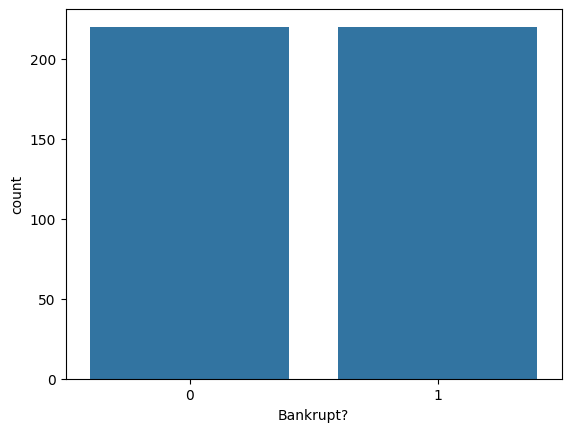

In [35]:
# Membuat count plot menggunakan seaborn untuk kolom 'Bangkrut?' dari DataFrame downsampled_df.
# Count plot digunakan untuk menghitung frekuensi kategori dalam kolom tertentu.
# Dalam hal ini, kita menghitung jumlah entri untuk masing-masing kategori di kolom 'Bangkrut?' setelah downsampling.
sns.countplot(x='Bankrupt?', data=downsampled_df)

## **Model Logistic Regression for Bankruptcy Prediction**

Classfication Report: :
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        51
           1       0.79      0.92      0.85        37

    accuracy                           0.86        88
   macro avg       0.86      0.87      0.86        88
weighted avg       0.87      0.86      0.86        88



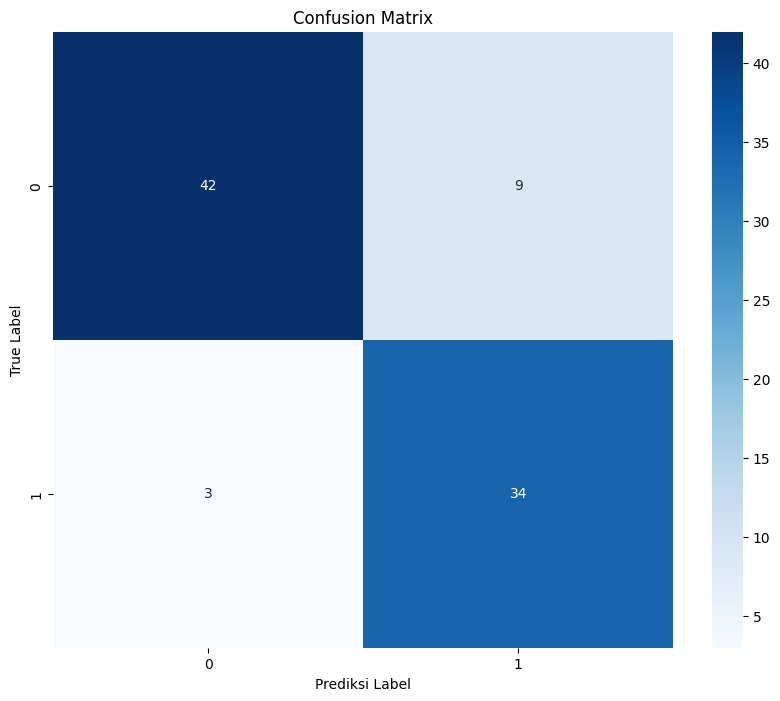


Accuracy: 0.8636


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
x = downsampled_df.drop(columns='Bankrupt?')
y = downsampled_df['Bankrupt?']

# Membagi data menjadi set pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Regresi Logistik
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluasi
print("Classfication Report: :")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Prediksi Label')
plt.show()

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

In [38]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.1 MB/s eta 0:00:00


# **Hyperparamter Tuning (Meningkatkan kinerja model)**

[I 2024-07-20 13:30:56,871] A new study created in memory with name: no-name-2931020a-1ba1-4d02-9a87-2bf2c88cdd10
[I 2024-07-20 13:30:56,971] Trial 0 finished with value: 0.8684764427230182 and parameters: {'logistic_C': 9.548937525450311}. Best is trial 0 with value: 0.8684764427230182.
[I 2024-07-20 13:30:57,047] Trial 1 finished with value: 0.8652800956910547 and parameters: {'logistic_C': 7.076158068784302}. Best is trial 0 with value: 0.8684764427230182.
[I 2024-07-20 13:30:57,133] Trial 2 finished with value: 0.8684764427230182 and parameters: {'logistic_C': 9.450545855143607}. Best is trial 0 with value: 0.8684764427230182.
[I 2024-07-20 13:30:57,191] Trial 3 finished with value: 0.8613448773448773 and parameters: {'logistic_C': 0.2523225104360314}. Best is trial 0 with value: 0.8684764427230182.
[I 2024-07-20 13:30:57,265] Trial 4 finished with value: 0.86231822971549 and parameters: {'logistic_C': 6.086523383329077}. Best is trial 0 with value: 0.8684764427230182.
[I 2024-07-2

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.89        51
           1       0.81      0.92      0.86        37

    accuracy                           0.88        88
   macro avg       0.87      0.88      0.87        88
weighted avg       0.88      0.88      0.88        88



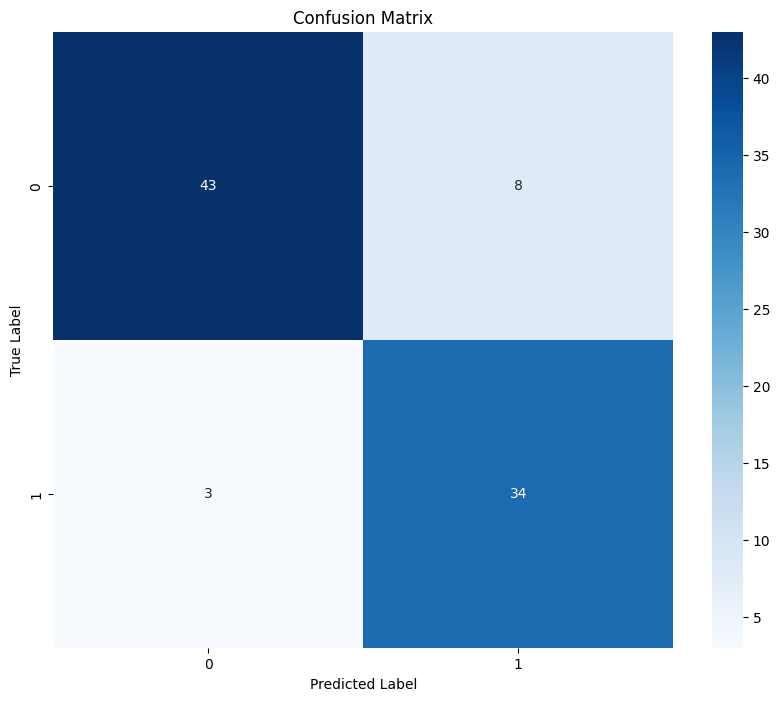


Accuracy: 0.8750


In [40]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Saran hyperparameter
    logistic_C = trial.suggest_float("logistic_C", 1e-3, 10)

    # Membuat model dasar
    logistic_regression = LogisticRegression(C=logistic_C, max_iter=1000)

    # Cross-validation
    scores = cross_val_score(logistic_regression, x_train, y_train, cv=5, scoring='f1')
    return scores.mean()

# Membuat studi Optuna
study = optuna.create_study(direction="maximize")

# Optimalkan hyperparameters
study.optimize(objective, n_trials=100)  # Sesuaikan n_trials sesuai kebutuhan

# Mendapatkan hyperparameters terbaik
best_params = study.best_params

# Membuat model terbaik dengan hyperparameters optimal
best_logistic_regression = LogisticRegression(C=best_params["logistic_C"], max_iter=1000)

# Melatih model terbaik
best_logistic_regression.fit(x_train, y_train)

# Membuat prediksi
y_pred = best_logistic_regression.predict(x_test)

# Metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

> **We notice a slight improvement in the performance after Hyperparameter Tuning**

# **Kindly Upvote**

**I hope you liked the notebook. Kindly provide your valuable comments and suggestions**